In [1]:
%pylab notebook
import numpy as np 
import h5py
import matplotlib.pyplot as plt
import random

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


In [2]:
def one_fea():
    D3_RF1 = np.loadtxt('../image_hypara/data_nRandom/D3_one_OOB')
    Offset_RF1 = np.loadtxt('../image_hypara/data_nRandom/Offset_one_OOB') 
    
    Xray_RF1 = np.loadtxt('../image_hypara/data_nRandom/Xray_one_OOB')
    SZ_RF1 = np.loadtxt('../image_hypara/data_nRandom/SZ_one_OOB')
    
    mean0 = np.array([D3_RF1[0,0],Xray_RF1[2,0],SZ_RF1[-1,0],Offset_RF1[1,0]])
    err0 = np.array([D3_RF1[0,1],Xray_RF1[2,1],SZ_RF1[-1,1],Offset_RF1[1,1]])
    print(mean0)
    print(err0)
    
    return mean0, err0

In [3]:
from scipy.special import comb
from itertools import combinations

def sta_score(score):
    mean_score = np.mean(score, axis = 1)
    std_score = np.std(score, axis = 1)
    sort = np.flip(np.argsort(mean_score))
    
    score1 = mean_score[sort[0]]
    err1 = std_score[sort[0]]
    return mean_score,std_score,sort

dmean = np.zeros((4,6))
derr = np.zeros((4,6))
for i in range(6):
    if i == 0:
        mean0,err0 = one_fea()
        dmean[0,0] = mean0[0]
        dmean[1,0] = mean0[1]
        dmean[2,0] = mean0[2]
        dmean[3,0] = mean0[3]
        
        derr[0,0] = err0[0]
        derr[1,0] = err0[1]
        derr[2,0] = err0[2]
        derr[3,0] = err0[3]
    
    else: #Xray and SZ consider min_samples_leaf == 10
        oPDF_score = np.loadtxt('../data/oob_oPDF/oPDF_oob_score%s' %(i+1))
        score2,err2,sort2 = sta_score(oPDF_score)
        dmean[0,i] = score2[sort2[0]]
        derr[0,i] = err2[sort2[0]]

        Xray_score = np.loadtxt('../data/oob_Xray_leaf10/Xray_oob_score%s' %(i+1))
        score2,err2,sort2 = sta_score(Xray_score)
        dmean[1,i] = score2[sort2[0]]
        derr[1,i] = err2[sort2[0]]

        SZ_score = np.loadtxt('../data/oob_SZ_leaf10/SZ_oob_score%s' %(i+1))
        score2,err2,sort2 = sta_score(SZ_score)
        dmean[2,i] = score2[sort2[0]]
        derr[2,i] = err2[sort2[0]]

        Offset_score = np.loadtxt('../data/oob_Offset/Offset_oob_score%s' %(i+1))
        score2,err2,sort2 = sta_score(Offset_score)
        dmean[3,i] = score2[sort2[0]]
        derr[3,i] = err2[sort2[0]]

[0.34358594 0.13172416 0.0924923  0.1835269 ]
[0.0424169  0.02894047 0.0168972  0.03815109]


<IPython.core.display.Javascript object>


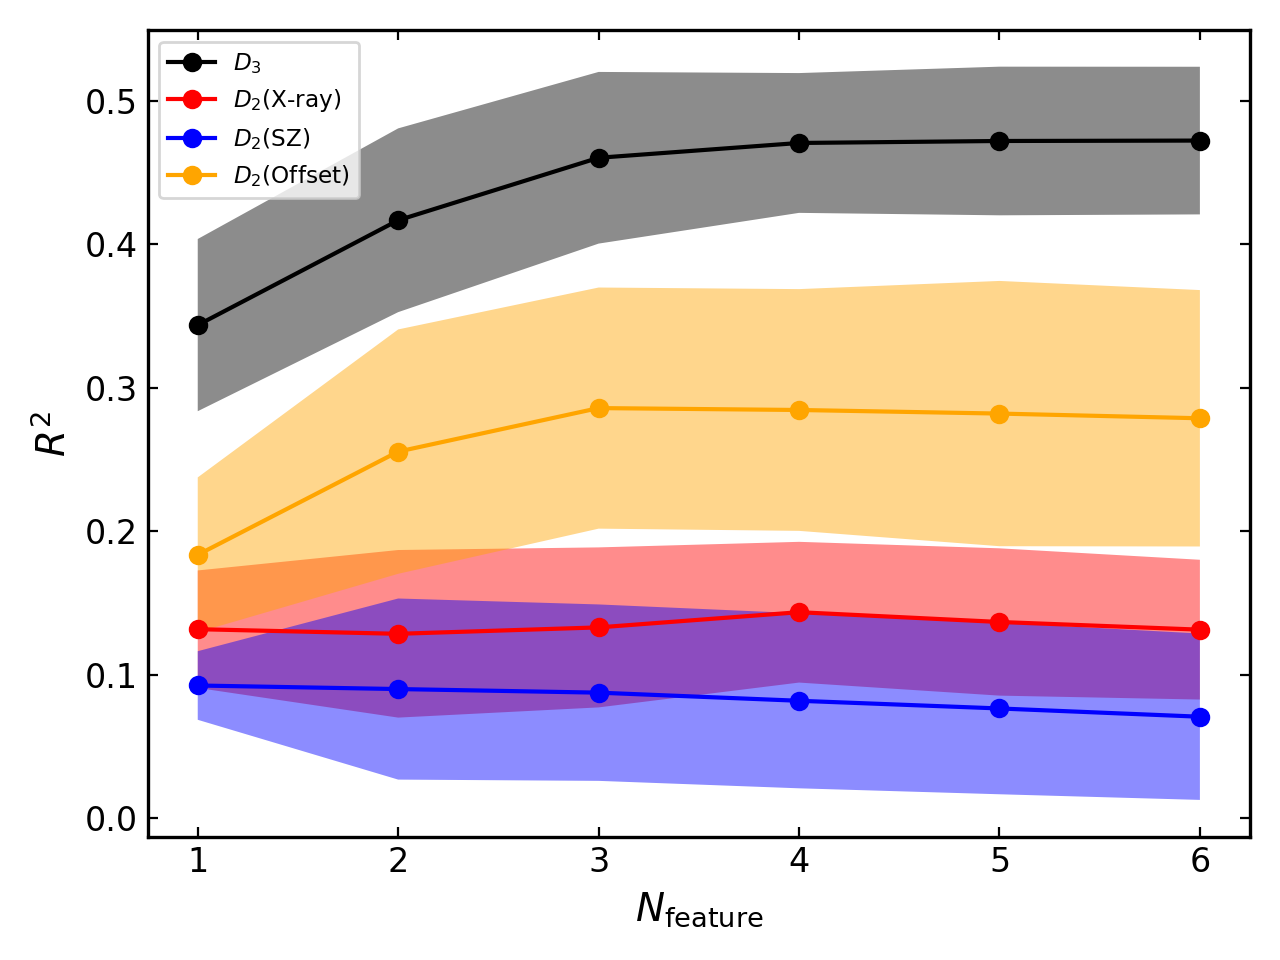

[[0.34358594 0.41663166 0.46017742 0.47048632 0.47186628 0.47215432]
 [0.13172416 0.12850348 0.13297374 0.14355934 0.13675054 0.13139692]
 [0.0924923  0.09001754 0.08751188 0.08185124 0.07649008 0.07074392]
 [0.1835269  0.25544086 0.28577364 0.28444912 0.28195148 0.2786767 ]]


In [6]:
#plt oob score statistically stability
#vesion--2
plt.figure()

xx = np.arange(1,7,1)
plt.plot(xx,dmean[0], marker = 'o', c ='k',label=r'$D_3$',zorder =2 )
plt.fill_between(xx,dmean[0] - derr[0]*np.sqrt(2),dmean[0] + derr[0]*np.sqrt(2),facecolor ='k', edgecolor = 'None', alpha = 0.45)
print(dmean)

plt.plot(xx,dmean[1],  marker = 'o', c ='r',label = r'$D_2$(X-ray)',zorder = 2)
plt.fill_between(xx,dmean[1] - derr[1]*np.sqrt(2),dmean[1] + derr[1]*np.sqrt(2), facecolor ='r', alpha = 0.45)
                
plt.plot(xx,dmean[2], marker = 'o', c ='b',label = r'$D_2$(SZ)',zorder = 2)
plt.fill_between(xx,dmean[2] - derr[2]*np.sqrt(2),dmean[2] + derr[2]*np.sqrt(2), facecolor ='b', alpha = 0.45)

plt.plot(xx,dmean[3], marker = 'o', c ='orange',label = r'$D_2$(Offset)',zorder =2)
plt.fill_between(xx,dmean[3] - derr[3]*np.sqrt(2),dmean[3] + derr[3]*np.sqrt(2), facecolor ='orange', alpha = 0.45)
                    
plt.xlabel(r'$N_{\rm feature}$', fontsize = 14)
plt.ylabel('$R^2$', fontsize = 14)
# plt.axhline(0.4,ls = '--',color='grey',zorder = 1)

plt.tick_params(top = 'on', right = 'on', which='both', labelsize = 12, direction = 'in')
bwith = 1.2 #边框宽度设置为2
ax = plt.gca()#获取边框
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)

plt.legend(loc = 2, fontsize = 'small')
# plt.grid(c = 'grey', ls = '--', alpha = 0.5)
plt.tight_layout()
plt.subplots_adjust(wspace =0 ,hspace = 0)
plt.savefig('./figs/score_sqrt2.pdf')

In [7]:
D3_RF1 = np.loadtxt('../image_hypara/data_nRandom/D3_one_OOB')
sqe = np.flip(np.argsort(D3_RF1[:,0]))
print(D3_RF1[sqe,0])
print(D3_RF1[sqe,1]*np.sqrt(2))

[ 3.43585943e-01  2.70084597e-01  1.91640847e-01  1.70826416e-01
  1.05482147e-01  8.03891237e-02  6.90923827e-02  5.98793670e-02
  3.47909458e-02  2.95540698e-02  2.67282475e-02  2.24023294e-02
  1.76938145e-02  8.57612473e-03  8.18429743e-03  4.49831914e-03
 -2.34612085e-04 -1.52625129e-03 -2.42352127e-03 -2.49205520e-03
 -5.80105102e-03 -8.61141719e-03 -9.24820298e-03 -9.32947584e-03
 -1.02681344e-02 -1.16278100e-02]
[0.05998655 0.04712094 0.03600697 0.03750088 0.02863066 0.02535784
 0.02155428 0.0211221  0.02474085 0.01780849 0.01156692 0.01061947
 0.02705913 0.01257511 0.01534751 0.01529265 0.02083686 0.01003094
 0.01009957 0.01496982 0.0061808  0.00891065 0.00107392 0.00108362
 0.01253433 0.00189579]


In [9]:
for i in range(5):
    score = np.loadtxt('../data/oob_oPDF/oPDF_oob_score%s' %(i+1))
    print(score.shape)
    mean_score = np.mean(score, axis = 1)
    std_score = np.std(score, axis = 1)
    sort = np.flip(np.argsort(mean_score))
    per = np.loadtxt('../data/oob_oPDF/oPDF_oob_per%s' %(i+1))

    print('top 5 mean score: ', mean_score[sort[:10]].round(3))
    print('top 5 std error: ', std_score[sort[:10]].round(3) * np.sqrt(2))
    print('top 5 label: ', per[sort[:10]] + 1)
    print(' ')

(26, 50)
top 5 mean score:  [ 0.334  0.225  0.13   0.097 -0.002 -0.014 -0.015 -0.058 -0.068 -0.072]
top 5 std error:  [0.07071068 0.07495332 0.05798276 0.06081118 0.04666905 0.04808326
 0.05515433 0.0622254  0.04101219 0.04242641]
top 5 label:  [ 1.  7.  4.  6. 16.  2.  3. 11. 15.  8.]
 
(325, 50)
top 5 mean score:  [0.417 0.38  0.377 0.367 0.363 0.361 0.354 0.351 0.35  0.349]
top 5 std error:  [0.06363961 0.06363961 0.06929646 0.05798276 0.07778175 0.06081118
 0.0622254  0.07495332 0.06363961 0.06363961]
top 5 label:  [[ 1.  7.]
 [ 1.  4.]
 [ 1.  6.]
 [ 1.  2.]
 [ 1. 24.]
 [ 1. 11.]
 [ 1.  3.]
 [ 1. 26.]
 [ 1.  5.]
 [ 1. 25.]]
 
(2600, 50)
top 5 mean score:  [0.46  0.441 0.438 0.436 0.431 0.429 0.429 0.426 0.426 0.422]
top 5 std error:  [0.05939697 0.05515433 0.05656854 0.0622254  0.0622254  0.06363961
 0.05374012 0.0622254  0.06363961 0.06646804]
top 5 label:  [[ 1.  7. 24.]
 [ 1.  7. 25.]
 [ 1.  2. 24.]
 [ 4. 11. 24.]
 [ 1.  7. 16.]
 [ 1.  7. 26.]
 [ 1.  7. 11.]
 [ 4. 11. 16.]
 [ 1.

## test

<IPython.core.display.Javascript object>


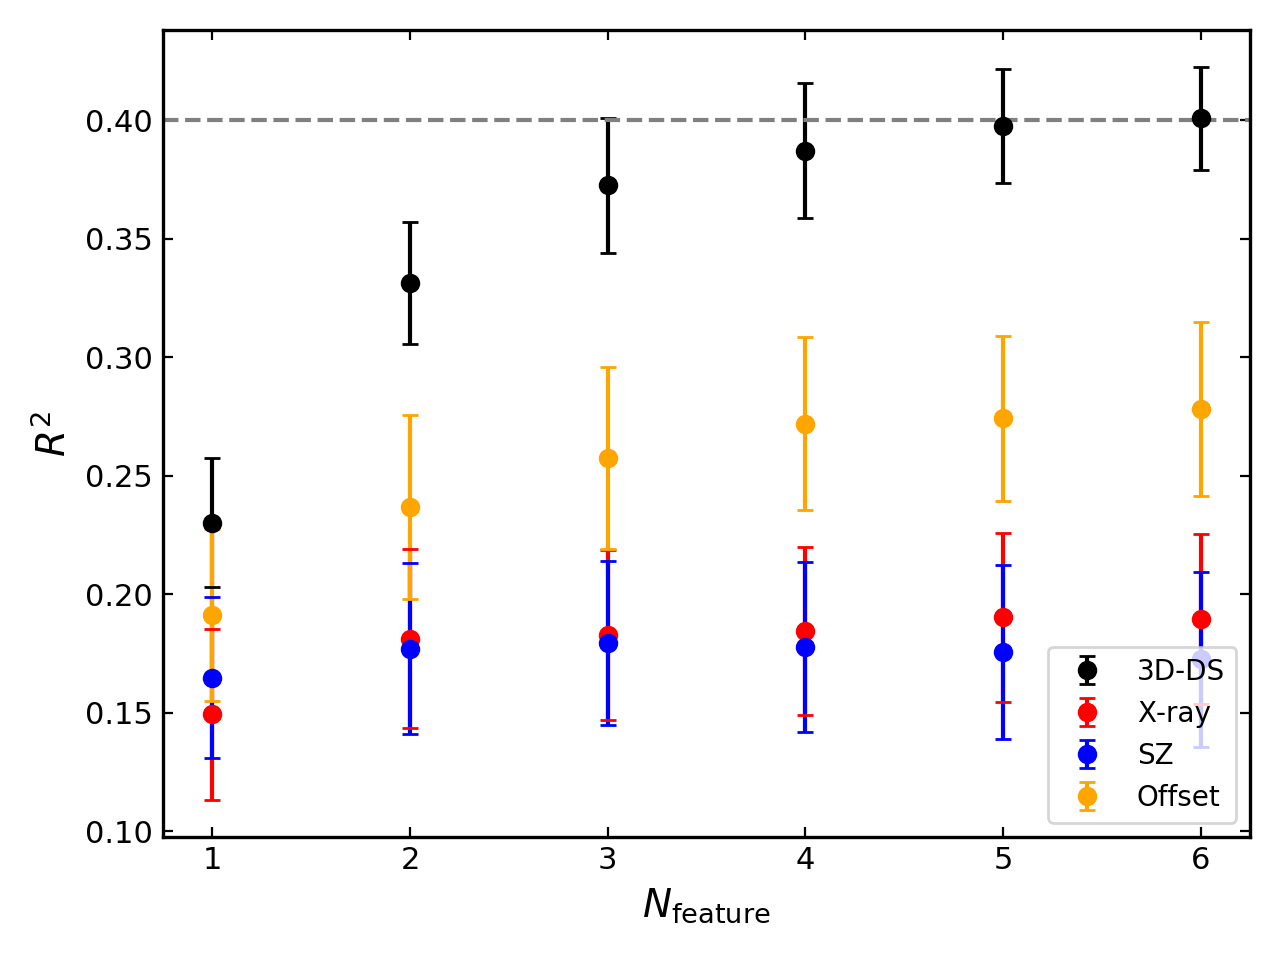

/home/qyli/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


In [2]:
#plt oob score statistically stability
#vesion--1
from scipy.special import comb
from itertools import combinations

def sta_score(score):
    mean_score = np.mean(score, axis = 1)
    std_score = np.std(score, axis = 1)
    sort = np.flip(np.argsort(mean_score))
    
    score1 = mean_score[sort[0]]
    err1 = std_score[sort[0]]
    return mean_score,std_score,sort

plt.figure()
for i in range(6):
    oPDF_score = np.loadtxt('../data/oob_oPDF/oPDF_oob_score%s' %(i+1))
    score2,err2,sort2 = sta_score(oPDF_score)
    if i == 0:
        plt.errorbar(i+1,score2[sort2[0]], yerr = err2[sort2[0]], fmt = 'o', c ='k',label = '3D-DS',capsize = 3)
    else:
        plt.errorbar(i+1,score2[sort2[0]], yerr = err2[sort2[0]], fmt = 'o', c ='k',capsize = 3)
    
    Xray_score = np.loadtxt('../data/oob_Xray/Xray_oob_score%s' %(i+1))
    score2,err2,sort2 = sta_score(Xray_score)
    if i == 0:
        plt.errorbar(i+1,score2[sort2[0]], yerr = err2[sort2[0]], fmt = 'o', c ='r',label = 'X-ray',capsize = 3)
    else:
        plt.errorbar(i+1,score2[sort2[0]], yerr = err2[sort2[0]], fmt = 'o', c ='r',capsize = 3)
    
    SZ_score = np.loadtxt('../data/oob_SZ/SZ_oob_score%s' %(i+1))
    score2,err2,sort2 = sta_score(SZ_score)
    if i == 0:
        plt.errorbar(i+1,score2[sort2[0]], yerr = err2[sort2[0]], fmt = 'o', c ='b',label = 'SZ', capsize = 3)
    else:
        plt.errorbar(i+1,score2[sort2[0]], yerr = err2[sort2[0]], fmt = 'o', c ='b', capsize = 3)
    
    Offset_score = np.loadtxt('../data/oob_Offset/Offset_oob_score%s' %(i+1))
    score2,err2,sort2 = sta_score(Offset_score)
    if i == 0:
        plt.errorbar(i+1,score2[sort2[0]], yerr = err2[sort2[0]], fmt = 'o', c ='orange',label = 'Offset', capsize = 3)
    else:
        plt.errorbar(i+1,score2[sort2[0]], yerr = err2[sort2[0]], fmt = 'o', c ='orange', capsize = 3)
    
plt.xlabel(r'$N_{\rm feature}$', fontsize = 14)
plt.ylabel('$R^2$', fontsize = 14)
plt.axhline(0.4,ls = '--',color='grey')

plt.tick_params(top = 'on', right = 'on', which='both', labelsize = 11, direction = 'in')
bwith = 1.2 #边框宽度设置为2
ax = plt.gca()#获取边框
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)

plt.legend(loc = 4)
# plt.grid(c = 'grey', ls = '--', alpha = 0.5)
plt.tight_layout()
plt.savefig('./figs/score.pdf')

<IPython.core.display.Javascript object>


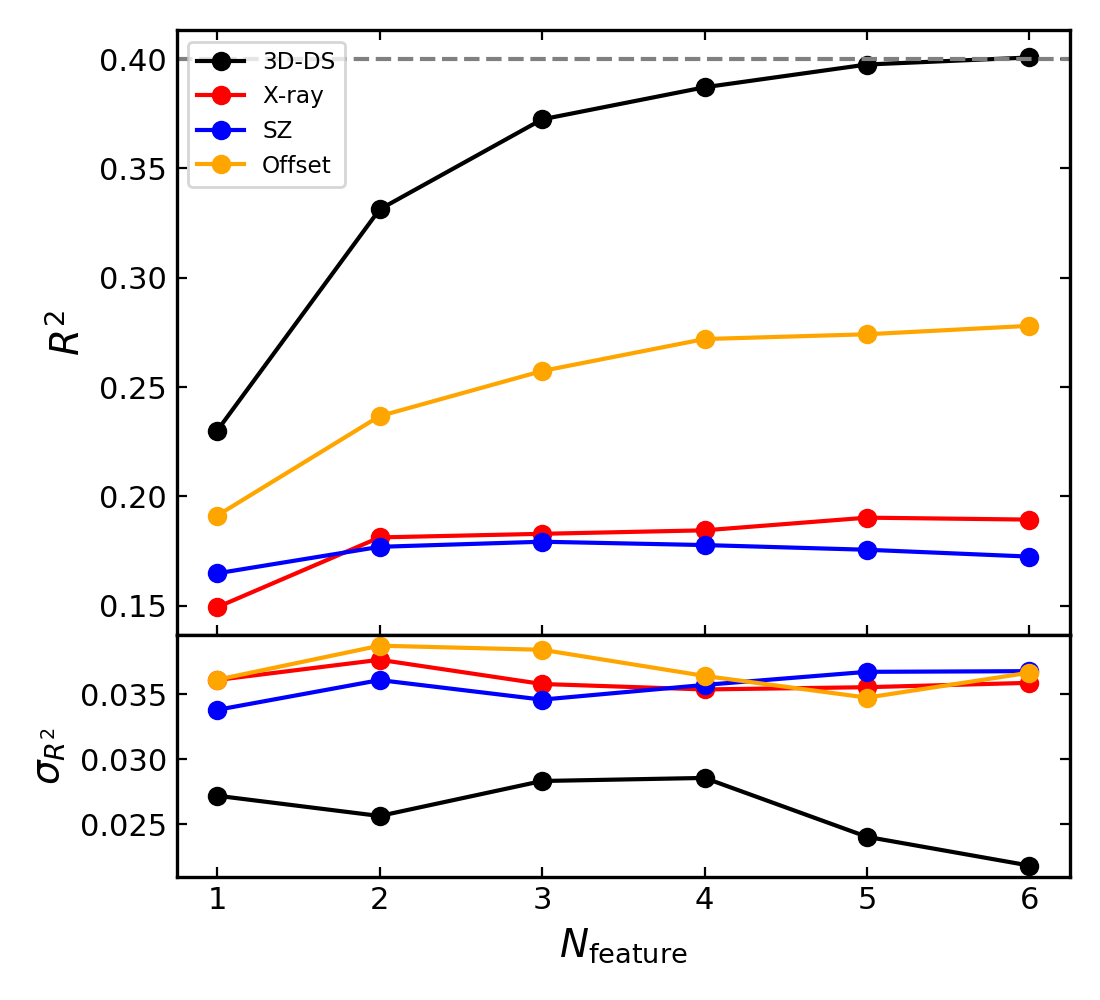

In [5]:
#plt oob score statistically stability
#vesion--2
from scipy.special import comb
from itertools import combinations

def sta_score(score):
    mean_score = np.mean(score, axis = 1)
    std_score = np.std(score, axis = 1)
    sort = np.flip(np.argsort(mean_score))
    
    score1 = mean_score[sort[0]]
    err1 = std_score[sort[0]]
    return mean_score,std_score,sort

plt.figure(figsize = (5.5,5))

ax1 = plt.subplot2grid((7,5),(0,0),colspan = 5,rowspan = 5)
ax10 = plt.subplot2grid((7,5),(5,0),colspan = 5,rowspan = 2)

dmean = np.zeros((4,6))
derr = np.zeros((4,6))
for i in range(6):
    oPDF_score = np.loadtxt('../data/oob_oPDF/oPDF_oob_score%s' %(i+1))
    score2,err2,sort2 = sta_score(oPDF_score)
    dmean[0,i] = score2[sort2[0]]
    derr[0,i] = err2[sort2[0]]
    
    Xray_score = np.loadtxt('../data/oob_Xray/Xray_oob_score%s' %(i+1))
    score2,err2,sort2 = sta_score(Xray_score)
    dmean[1,i] = score2[sort2[0]]
    derr[1,i] = err2[sort2[0]]
    
    SZ_score = np.loadtxt('../data/oob_SZ/SZ_oob_score%s' %(i+1))
    score2,err2,sort2 = sta_score(SZ_score)
    dmean[2,i] = score2[sort2[0]]
    derr[2,i] = err2[sort2[0]]
    
    Offset_score = np.loadtxt('../data/oob_Offset/Offset_oob_score%s' %(i+1))
    score2,err2,sort2 = sta_score(Offset_score)
    dmean[3,i] = score2[sort2[0]]
    derr[3,i] = err2[sort2[0]]

xx = np.arange(1,7,1)
ax1.plot(xx,dmean[0], marker = 'o', c ='k',label='3D-DS')
ax10.plot(xx,derr[0], marker = 'o', c ='k')

ax1.plot(xx,dmean[1],  marker = 'o', c ='r',label = 'X-ray')
ax10.plot(xx,derr[1], marker = 'o', c ='r')
                
ax1.plot(xx,dmean[2], marker = 'o', c ='b',label = 'SZ')
ax10.plot(xx,derr[2], marker = 'o', c ='b')

ax1.plot(xx,dmean[3], marker = 'o', c ='orange',label = 'Offset')
ax10.plot(xx,derr[3], marker = 'o', c ='orange')
                
    
ax10.set_xlabel(r'$N_{\rm feature}$', fontsize = 14)
ax1.set_ylabel('$R^2$', fontsize = 14)
ax10.set_ylabel(r'$\sigma_{R^2}$', fontsize = 14)
ax1.axhline(0.4,ls = '--',color='grey')

ax1.tick_params(top = 'on', right = 'on', which='both', labelsize = 11, direction = 'in')
ax10.tick_params(right = 'on', which='both', labelsize = 11, direction = 'in')
bwith = 1.2 #边框宽度设置为2
ax = plt.gca()#获取边框
ax1.spines['bottom'].set_linewidth(bwith)
ax1.spines['left'].set_linewidth(bwith)
ax1.spines['top'].set_linewidth(bwith)
ax1.spines['right'].set_linewidth(bwith)

ax10.spines['bottom'].set_linewidth(bwith)
ax10.spines['left'].set_linewidth(bwith)
ax10.spines['top'].set_linewidth(bwith)
ax10.spines['right'].set_linewidth(bwith)

ax1.legend(loc = 2, fontsize = 'small')
# plt.grid(c = 'grey', ls = '--', alpha = 0.5)
plt.tight_layout()
plt.subplots_adjust(wspace =0 ,hspace = 0)
plt.savefig('./figs/score.pdf')

top 5 mean score:  [ 0.334  0.225  0.13   0.097 -0.002]
top 5 std error:  [0.05  0.053 0.041 0.043 0.033]
top 5 label:  [ 1.  7.  4.  6. 17.]
top 5 mean score:  [0.417 0.38  0.377 0.367 0.363]
top 5 std error:  [0.045 0.045 0.049 0.041 0.055]
top 5 label:  [[ 1.  7.]
 [ 1.  4.]
 [ 1.  6.]
 [ 1.  2.]
 [ 1. 25.]]
top 5 mean score:  [0.46  0.441 0.438 0.436 0.431]
top 5 std error:  [0.042 0.039 0.04  0.044 0.044]
top 5 label:  [[ 1.  7. 25.]
 [ 1.  7. 26.]
 [ 1.  2. 25.]
 [ 4. 12. 25.]
 [ 1.  7. 17.]]
top 5 mean score:  [0.47  0.464 0.462 0.461 0.461]
top 5 std error:  [0.034 0.044 0.039 0.041 0.042]
top 5 label:  [[ 1.  7. 12. 25.]
 [ 1.  7. 10. 25.]
 [ 1.  7. 23. 25.]
 [ 1.  2.  7. 25.]
 [ 1.  4.  7. 25.]]
top 5 mean score:  [0.472 0.471 0.471 0.469 0.467]
top 5 std error:  [0.037 0.034 0.034 0.033 0.034]
top 5 label:  [[ 1.  7. 10. 12. 25.]
 [ 1.  4.  7. 12. 25.]
 [ 1.  2.  7. 12. 25.]
 [ 1.  7. 12. 25. 26.]
 [ 1.  7. 12. 23. 25.]]
top 5 mean score:  [0.472 0.471 0.47  0.469 0.469]
top